<a href="https://colab.research.google.com/github/Avinash-Saudagar/AirBnb-Analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/AlmaBetter/Capstone Project/AirBnB Bookings Analysis/Airbnb NYC 2019.csv'
df_airbnb = pd.read_csv(path)

In [4]:
df_airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [8]:
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df_airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [10]:
df_airbnb['neighbourhood'].nunique()

221

In [11]:
df_airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#Let's do the analysis step by step!

In [14]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service

top_host = df_airbnb.host_id.value_counts().head(10)
top_host.reset_index()

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [16]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'

top_host_check = df_airbnb.calculated_host_listings_count.max()
top_host_check

327

In [20]:
df_top_host = pd.DataFrame(top_host)
df_top_host.reset_index(inplace=True)
df_top_host.rename(columns={'index':'host_id','host_id':'count'},inplace=True)

In [21]:
df_top_host

,host_id,count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

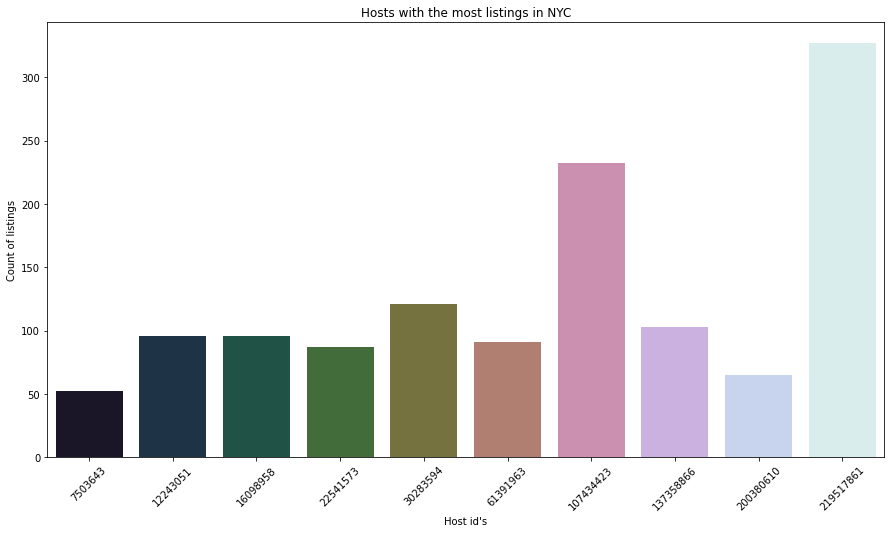

In [53]:
#setting figure size
plt.figure(figsize=(15,8))

viz=sns.barplot(x='host_id', y='count', data=df_top_host, palette="cubehelix")
viz.set_title('Hosts with the most listings in NYC')
viz.set_ylabel('Count of listings')
viz.set_xlabel('Host id\'s')
viz.set_xticklabels(viz.get_xticklabels(),rotation=45)

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

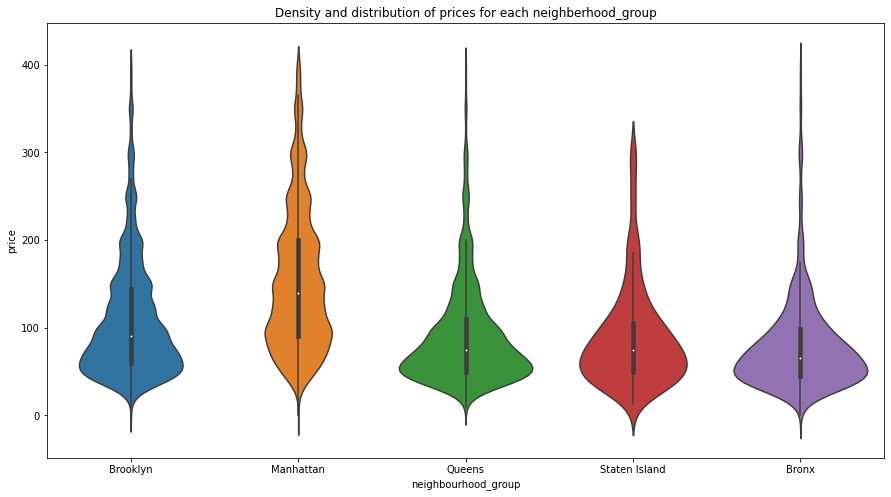

In [55]:
#creating a sub-dataframe with no extreme values / less than 500
price_less_then_400  = df_airbnb[df_airbnb['price'] < 400]

#setting figure size
plt.figure(figsize=(15,8))

#using violinplot to showcase density and distribtuion of prices 
viz2 = sns.violinplot(data=price_less_then_400,x='neighbourhood_group',y='price')
viz2.set_title('Density and distribution of prices for each neighberhood_group')

Great, with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

In [47]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods 
df_airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

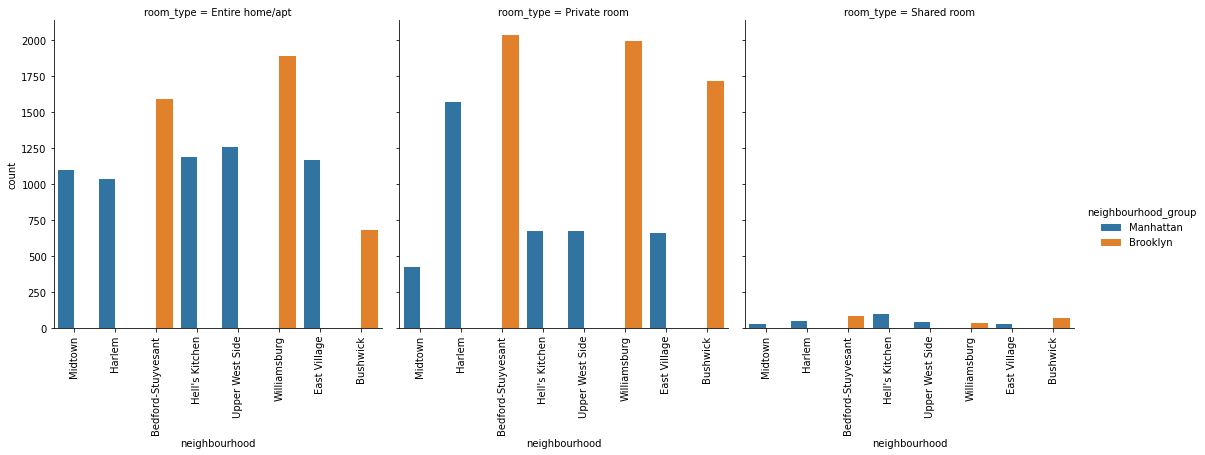

In [51]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe

sub_data = df_airbnb[df_airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem',
                                              'Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side''Crown Heights','Midtown'])]

viz3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_data , kind='count')
viz3.set_xticklabels(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


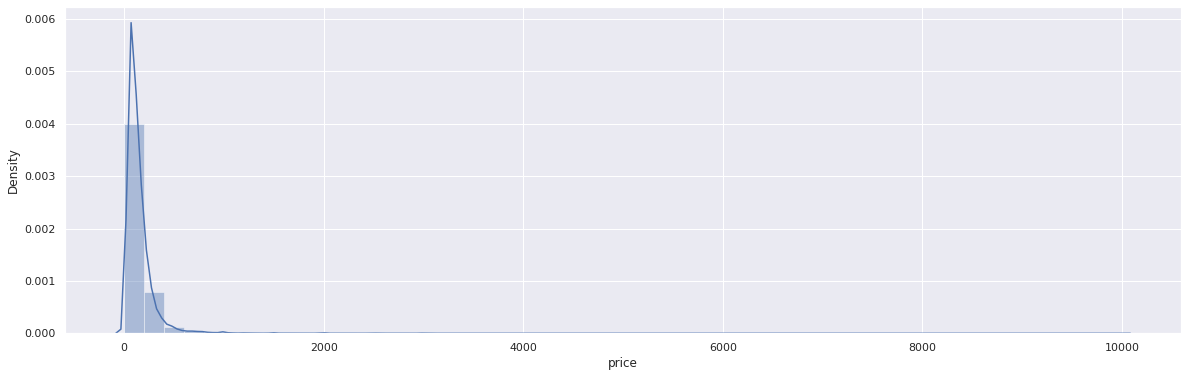

In [57]:
sns.set(rc={"figure.figsize":(20,6)})
sns.distplot(df_airbnb['price'],hist=True)

Text(0.5, 0, 'minimum_nights')

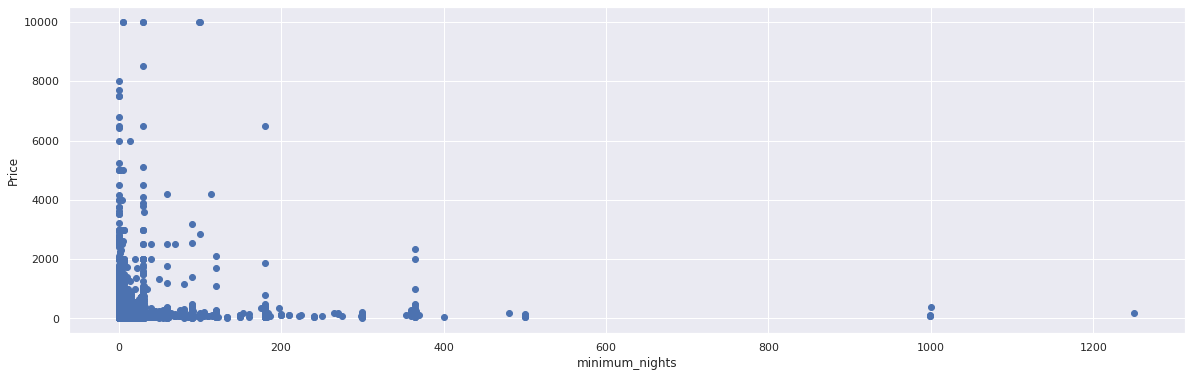

In [62]:
# price vs minimum_nights

plt.scatter(y= df_airbnb['price'],x = df_airbnb['minimum_nights'])
plt.ylabel('Price')
plt.xlabel('minimum_nights')

looks many data points are clustured on 0 price range, few have min nights for stay but price is 0. looks like anomaly in price.
#there are many outliers as well.

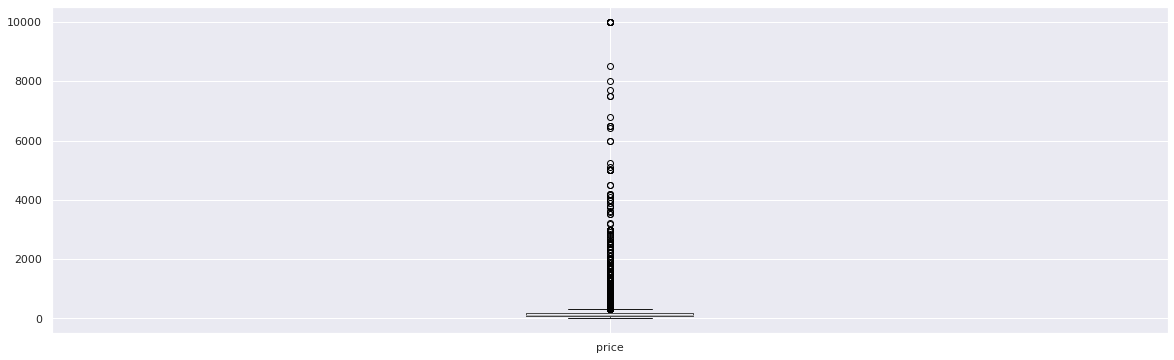

In [65]:
#we can see the presence of many outliers in price. Definitely we'll remove those, Patience!

df_airbnb.boxplot(column = ['price'])

Let's check the **correlation** matrix to understand how are the features interrelated with each other.<br> 

Also to get an idea which are the most important features in this data.

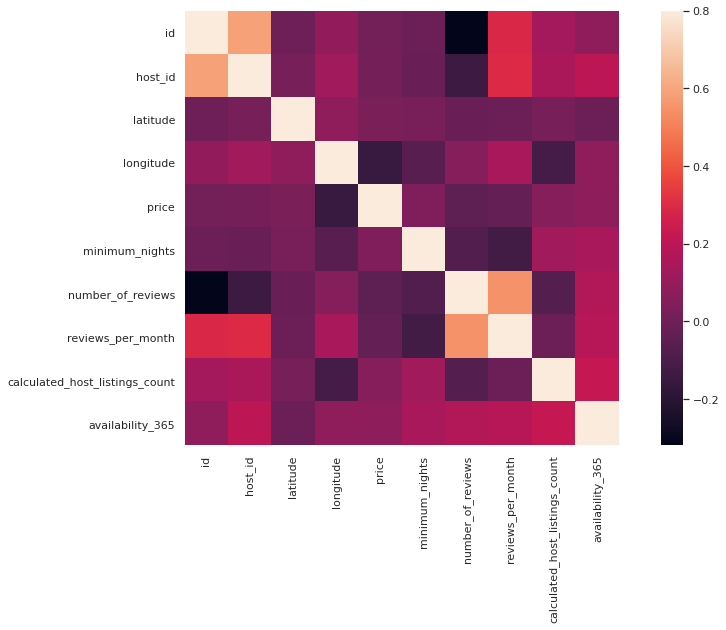

In [68]:
#correlation matrix
plt.figure(figsize=(15,8))
corrmat = df_airbnb.corr()
sns.heatmap(corrmat, vmax=.8, square=True);



Clearly from the heatmap we can see the correlation between different features that can affect a airbnb listing. <br>

Guess what? There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count. <br>

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

**Let's check the most no of listings in NYC first!**



In [70]:
#top 5 listings on Airbnb in entire NYC:

listings_count_df=df_airbnb['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Private Room,11


Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home

In [73]:
top_10_hosts=df_airbnb['host_name'].value_counts()[:10] #top 10 hosts on the basis of no of listings in entire NYC!

In [74]:
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC')

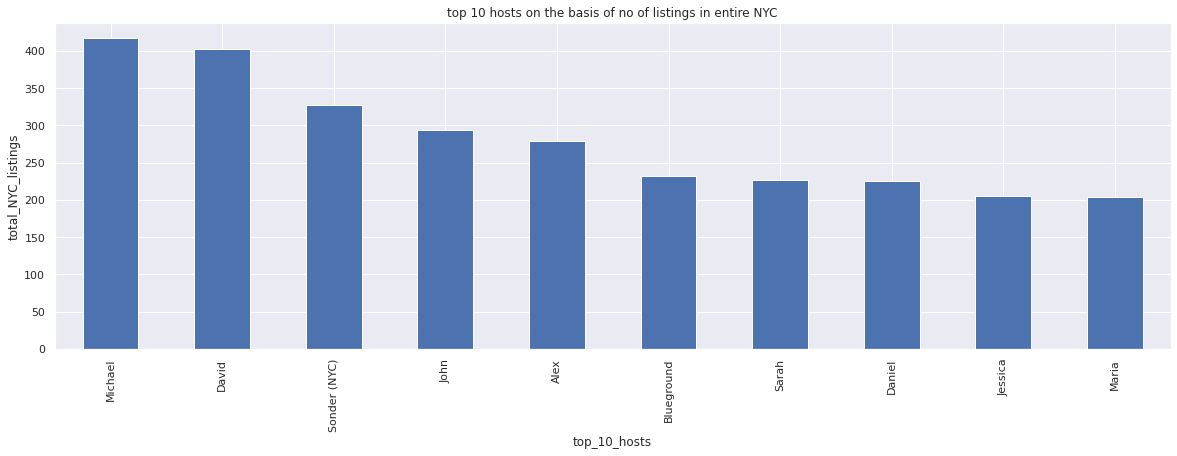

In [76]:
top_10_hosts.plot(kind='bar',color='b')
plt.xlabel('top_10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC')

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group')

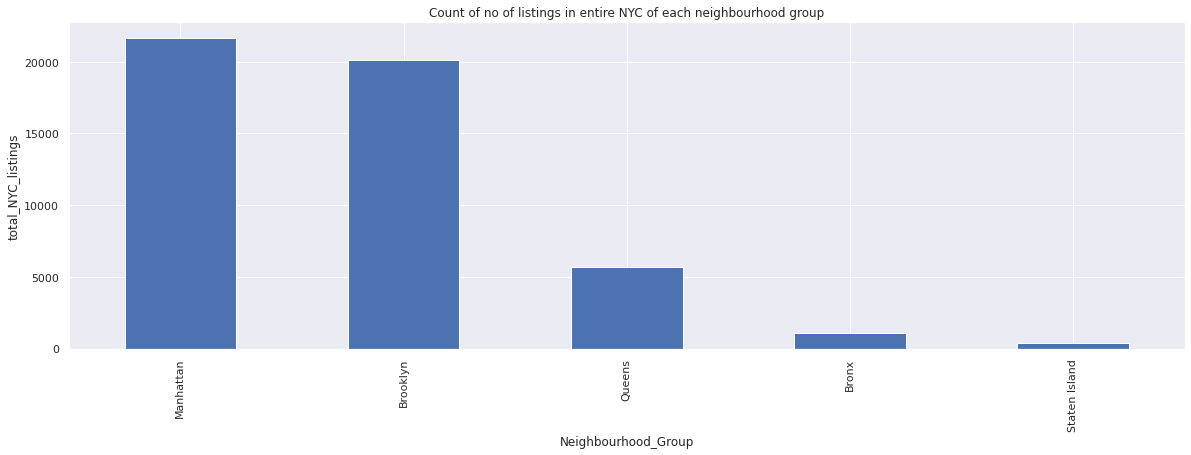

In [78]:
#the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC! 
df_airbnb['neighbourhood_group'].value_counts().plot(kind='bar',color='b')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group')

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

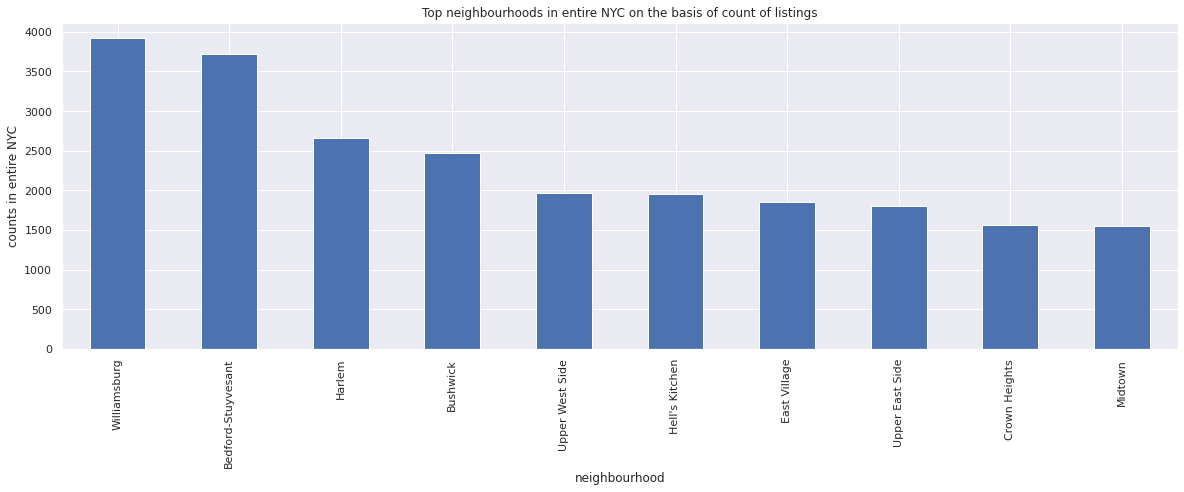

In [79]:
top_10_neigbours= df_airbnb['neighbourhood'].value_counts()[:10] #checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_10_neigbours.plot(kind='bar',color='b')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

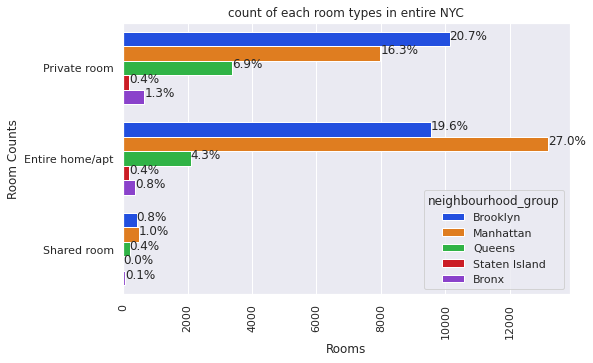

In [80]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df_airbnb,palette='bright')

total = len(df_airbnb['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

# **Let's look at the distribution of the listings with availability**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


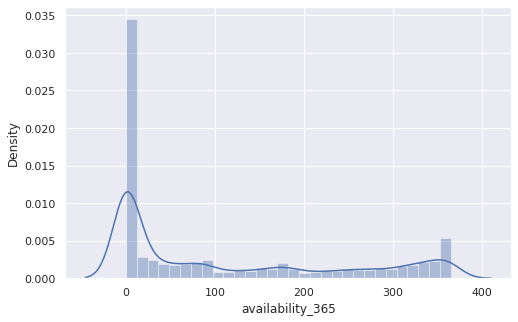

In [81]:
#distribution of listings availability at NYC!
sns.distplot(df_airbnb['availability_365'])

# **Bi-variate Analysis**